```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [ ]:
#GPU
import torch
import matplotlib.pyplot as plt
import torchvision

# Diagram

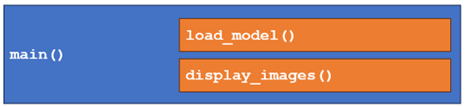

# Code

In [ ]:
def display_images(images):
  images = (images - images.min()) / (images.max() - images.min())

  grid_image = torchvision.utils.make_grid(images).permute(1, 2, 0).cpu().numpy()
  plt.imshow(grid_image)
  plt.axis('off')
  plt.show()

In [ ]:
def load_model(use_gpu=True):
   model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                           'PGAN',
                           model_name='celebAHQ-512',
                           pretrained=True,
                           useGPU=use_gpu)
   return model

In [ ]:
def main():
    TOTAL_IMAGES = 4

    use_gpu = torch.cuda.is_available()

    model = load_model(use_gpu=use_gpu)

    noise, _ = model.buildNoiseData(TOTAL_IMAGES)

    with torch.no_grad():
        images = model.test(noise)

    display_images(images)

# Execution

In [ ]:
main()